# Evaluating a machine learning model

Evaluating a machine learning model is critical for its real-world success. It helps identify the model's strengths and weaknesses, ensuring it performs optimally on unseen data. This prevents issues like overfitting, where the model becomes to specific to the training data. By choosing the right evaluation metrics we can gauge the model's effectiveness for the intended task and avoid deploying a solution that might not meet our needs

This evaluation often involves comparing the true labels to the ones predicted by the model.

With scikit-learn, there are a few built-in ways of evaluating models/estimators:

1. Estimator's built-in `score()` method
2. Scoring parameters
3. Problem specific metric functions

For more information follow [this link](https://scikit-learn.org/stable/modules/model_evaluation.html) to the documentation


In [96]:
# Importing packages

# Utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Pre-processing
from sklearn.model_selection import train_test_split

# Scoring metrics
from sklearn.model_selection import cross_val_score

## Classification metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Regression metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
# Importing data
heart_disease = pd.read_csv('../datasets/heart-disease.csv')
heart_disease.head()

housing = fetch_california_housing(as_frame=True)

## Classification model


In [3]:
# Creating and fitting a Classification model

# Setting random seed
np.random.seed(42)

# Creating X_classification and y_classification
X_classification = heart_disease.drop('target', axis=1)
y_classification = heart_disease['target']

# Splitting the data into training and test sets
(
    X_classification_train,
    X_classification_test,
    y_classification_train,
    y_classification_test,
) = train_test_split(X_classification, y_classification, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fitting the model
clf.fit(X_classification_train, y_classification_train)

RandomForestClassifier()

## Regression model


In [4]:
# Creating and fitting a Regression model

# Setting seed
np.random.seed(42)

# Creating X_regression and y_regression
X_regression = housing.data  # type: ignore
y_regression = housing.target  # type: ignore

# Splitting data into training and test sets
(
    X_regression_train,
    X_regression_test,
    y_regression_train,
    y_regression_test,
) = train_test_split(X_regression, y_regression, test_size=0.2)

# Creating regression model instance
model = RandomForestRegressor()

# Fitting the model
model.fit(X_regression_train, y_regression_train)

RandomForestRegressor()

## Evaluating a model with the `score` method

Scikit-learn's `score` method provides a convenient way to assess a trained model's performance. Inherent to most estimators (models) in scikit-learn, this method calculates a specific metric based on the model type.

For regression tasks, it often returns to the coefficient of determination ($R^2$), while in classification, it might default to accuracy. however, the `score` method is flexible and often allows specifying alternative metrics. This simplifies the evaluation process, especially when comparing different models of fine-tuning hyperparameters.

The highest value for the score method is 1.0, be it for classification or regression models.


### Evaluating Classification model


In [5]:
# Measuring score on training data
clf.score(X_classification_train, y_classification_train)

1.0

In [6]:
# Measuring score on the test data
clf.score(X_classification_test, y_classification_test)

0.8524590163934426

### Evaluating Regression model


In [7]:
# Measuring the score on the training data
model.score(X_regression_train, y_regression_train)

0.973652044608591

In [8]:
# Measuring the score on the test data
model.score(X_regression_test, y_regression_test)

0.8059809073051385

## `cross_val_score()`

This function uses a number $k$ passed as the parameter `cv=`, and implements a k-fold-Cross-validation, where the model is trained on $k$ different versions of training data, and evaluated on $k$ different versions of the test data.

It's important to do a cross validation to understand how a model can perform on a multitude of train-test splits, giving it a more robust and realistic score.


## Evaluating a model using Scoring parameters

Differently to the `score()` method, when using a scoring parameters, you can choose a specific metric to evaluate the model during processes. This yields more control over the evaluation on how well a model performs on unseen data. This parameter can be used within functions like `cross_val_score()`. Determining the metric for evaluating models


### Evaluating Classification model


In [9]:
# Checking score value with the .score() method
clf.score(X_classification_test, y_classification_test)

0.8524590163934426

In [10]:
# Checking score value with cross_value_score()
cross_val_score(clf, X_classification, y_classification)

array([0.83606557, 0.8852459 , 0.81967213, 0.76666667, 0.8       ])

In [12]:
# Setting random seed
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_classification_test, y_classification_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(
    cross_val_score(clf, X_classification, y_classification, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

## Problem Specific metric functions

While the `score` method offers a baseline evaluation, relying solely on its default metric can be misleading. For robust model assessment, choosing task-specific metrics is crucial. Selecting the right evaluation functions allows for a more nuanced understanding of a model's strengths and weaknesses, guiding hyperparameter tuning and addressing biasses in the data


### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


#### **_Accuracy_**

In classification models, accuracy refers toi the proportion of predictions that the model makes correctly. It's a simple and intuitive metric, calculated by dividing the number of correct predictions by the total number of predictions made. If a model predicts the class of 80 out of 100 samples correctly, it has an accuracy of 80%.


In [14]:
# Setting random seed
np.random.seed(42)

# Getting cross_val_score of classification model
score = cross_val_score(clf, X_classification, y_classification)

# Getting mean of cross validation score
score_mean = np.mean(score)

# Printing score
f'Heart disease classifier Cross-Validated Accuracy: {score_mean * 100:.2f}%'

'Heart disease classifier Cross-Validated Accuracy: 82.48%'

#### **_Curve Area under the receiver operating characteristic curve (AUC/ROC)_**

-> True positive = models predicts 1 when truth is 1

-> False positive = models predicts 1 when truth is 0

-> True negative = models predicts 0 when truth is 0

-> False negative = models predicts 0 when truth is 1

- Roc curve (ROC)

ROC curve (Receiver Operating Characteristic Curve) and AUC (Area Under the Curve) together provide a more nuanced view of a classification model's performance compared tto just accuracy. The ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis.

TPR measures the proportion of actual positives the model correctly classified, while FPR measures the proportions of negatives incorrectly classified as positives. As the model's classification threshold varies, TPR and FPR, and the ROC curve traces this trade-off.

- Area under curve (AUC)

AUC, the area under the curve, summarizes this performance. A perfect model separates the positive and negative classes completely, resulting in a diagonal ROC curve with an AUC of 1. Conversely, an uninformative model performs no better than random guessing, yielding an AUC of 0.5. Therefore, AUC offers a single metric capturing the model's ability to discriminate between classes across various classification models.


In [17]:
# Make predictions with probabilities
y_probs = clf.predict_proba(X_classification_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [23]:
# Separating positive and negative probs
y_probs_positive = y_probs[:, 1]

# Viewing probs
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [27]:
# Calculating fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_classification_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [29]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr: np.ndarray, tpr: np.ndarray) -> None:
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """

    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline)
    plt.plot(
        [0, 1],
        [0, 1],
        color="darkblue",
        linestyle="--",
        label="Guessing",
    )

    # Customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating characteristic (ROC) curve")
    plt.legend()

    # Showing graph
    plt.show()

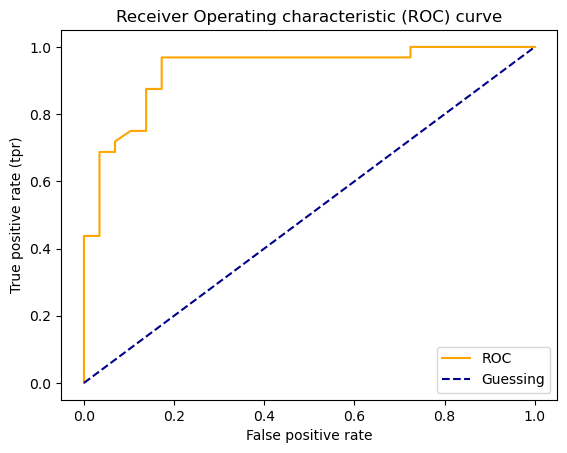

In [32]:
# Plotting ROC curve
plot_roc_curve(fpr=fpr, tpr=tpr)

In [33]:
# Measuring the score of a ROC curve
roc_auc_score(y_classification_test, y_probs_positive)

0.9304956896551724

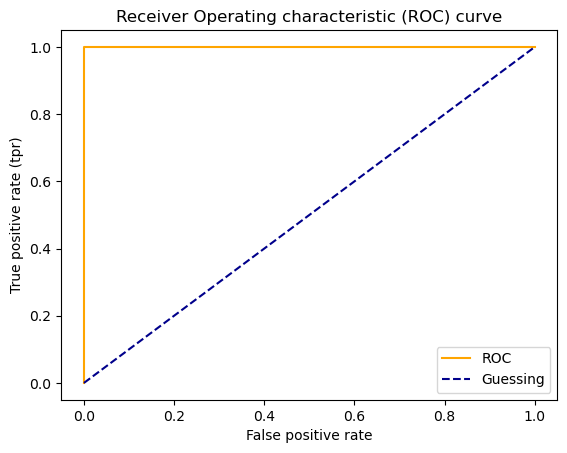

In [35]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_classification_test, y_classification_test)

plot_roc_curve(fpr=fpr, tpr=tpr)

#### **_Confusion Matrix_**

A Confusion Matrix is a square table that visually summarizes the performance of a classification model. It''s not a single metric, but rather a breakdown of how many predictions fall into different categories. Each row represents the actual class, and each column represents the predicted class.

The diagonal elements (TP and TN) represent the correct predictions - True positives (TP) being the number of correctly classified positive instances and True negatives (TN), being the number of correctly classified negative instances. The off-diagonal elements (FP and FN) capture the errors - False positive (FP) are instances where the model predicted positive but they were actually negative, and False negatives (FN) are instances where the model predicted negative but they were actually positive.

By analysing the confusion matrix, you can identify areas for improvement. For instance, a high number of False negatives might indicate the model struggles with a specific class, prompting further investigation or data augmentation. It's a valuable tool ofr understanding where the model makes mistakes and how those mistakes might impact its real-world application.

In essence, giving you an idea of where the model is getting confused.


In [60]:
# Making predictions with probabilities
y_preds = clf.predict(X_classification_test)

confusion_matrix(y_classification_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [43]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_classification_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


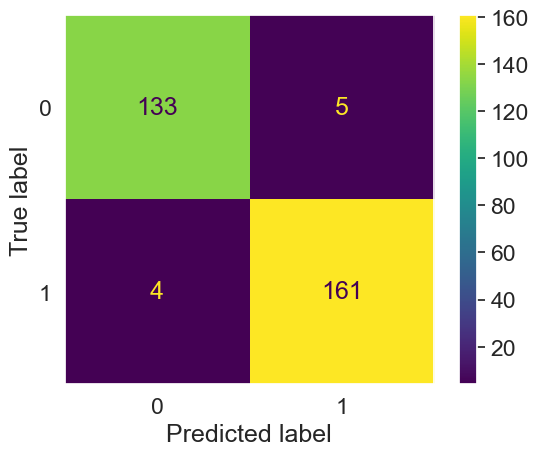

In [55]:
# Plotting a confusion matrix from estimator
ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X=X_classification,
    y=y_classification,
)
plt.grid(False)

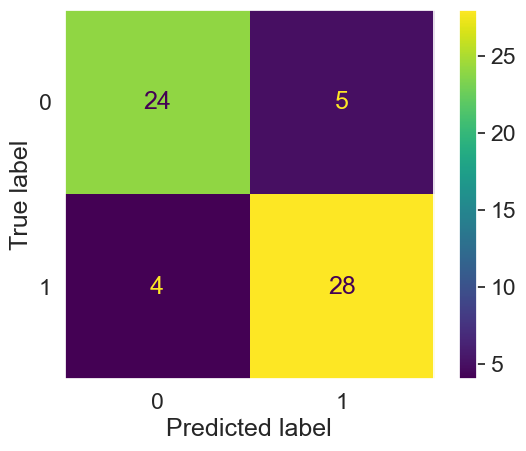

In [54]:
# Plotting a confusion matrix from predictions

ConfusionMatrixDisplay.from_predictions(y_classification_test,
                                        y_preds_confusion_matrix)
plt.grid(False)

#### **_Classification Report_**

A classification offers a comprehensive analysis of a model's performance for multi-class classification problems. It doesn't provide a single metric but, presents various performance measures for each class. These metrics are calculated based on the values in the confusion matrix.

- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Support - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. A perfect accuracy is equal to 1.0.
- Macro AVG - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric
- Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how manu samples are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


In [72]:
clf_report = pd.DataFrame(
    classification_report(y_classification_test, y_preds,
                          output_dict=True)).transpose()
clf_report


,precision,recall,f1-score,support
0,0.857143,0.827586,0.842105,29.000000
1,0.848485,0.875000,0.861538,32.000000
accuracy,0.852459,0.852459,0.852459,0.852459
macro avg,0.852814,0.851293,0.851822,61.000000
weighted avg,0.852601,0.852459,0.852300,61.000000


In [76]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)  # Model predicts every case as 0

pd.DataFrame(
    classification_report(
        disease_true,
        disease_preds,
        output_dict=True,
        zero_division=True,
    )).transpose()

,precision,recall,f1-score,support
0.0,0.99990,1.0000,0.999950,9999.0000
1.0,1.00000,0.0000,0.000000,1.0000
accuracy,0.99990,0.9999,0.999900,0.9999
macro avg,0.99995,0.5000,0.499975,10000.0000
weighted avg,0.99990,0.9999,0.999850,10000.0000


### Regression model evaluation metrics

- $R^2$ (r-squared) or coefficient of determination
- Mean absolute error (MAE)
- Mean squared error (MSE)


#### **_R-squared ($R^2$) or coefficient of determination_**

The coefficient of determination (R-squared) is a statistical metric that shows how well a regression model fits the data. It essentially represents the proportion of variance in the outcome variable (what is to be predicted) that can be explained by the predictor variable(s) in the model.

R-squared is measured between 0 and 1, with higher values indicating a better fit. In other words, a value closer to 1 suggests the model explains most of the variation in the data. It can also be negative, it happens when the model performs worse than just taking the average of the outcome variable. It essentially means the model is not explaining the data at all, and might even be introducing more noise.


In [102]:
# Fill an array with y_regression_test mean
y_regression_test_mean = np.full(len(y_regression_test),
                                 y_regression_test.mean())
y_regression_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [85]:
# Creating the r2_Score
r2_score(y_true=y_regression_test, y_pred=y_regression_test_mean)

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

#### **_Mean absolute error (MAE)_**

Mean Absolute Error (MAE) is a common way to assess how accurate a regression model is. It gauges the average magnitude of the difference between predicted and actual values.

Unlike some metrics, MAE doesn't consider the direction of the errors (overestimations or underestimations). Instead, it takes the absolute difference between each prediction and its corresponding actual value.

Finally, it calculates the average of these absolute errors to provide a single MAE value. The lower the MAE, the better the overall performance of the model in terms of predicting close to the actual values.

The MAE is denoted by:

$\pm{value}$


In [101]:
# Creating predictions
y_regression_preds = model.predict(X_regression_test)

In [91]:
# Measuring the mean absolute error (MAE)
mae = mean_absolute_error(y_regression_test, y_regression_preds)

mae

0.3270458119670544

In [94]:
# Creating DataFrame connecting actual values to predictions
df = pd.DataFrame(data={
    'actual values': y_regression_test,
    'predicted_values': y_regression_preds
})

df['differences'] = df['predicted_values'] - df['actual values']

df.head(10)

,actual values,predicted_values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [95]:
# Calculating the MAE using formulas and differences
np.abs(df['differences']).mean()

0.3270458119670544

#### Mean Squared Error (MSE)

Mean Squared Error (MSE ) is a metric used to asses how well a model predicts a continuous outcome variable. It reflects the average squared difference between the actual values and the forecast values from the model.

Unlike MAE which uses absolute differences, squaring the errors in MSE gives larger weight to bigger prediction mistakes. MSE is calculated by summing the squared error for each data point, and then dividing by the total number of data points

A lower MSE indicates a better fit, as the model's predictions are on average closer to the actual values.


In [98]:
# Getting the MSE
mse = mean_squared_error(y_regression_test, y_regression_preds)
mse

0.2542443610174998

In [99]:
df['squared_differences'] = np.square(df['differences'])
df.head()

,actual values,predicted_values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [100]:
# Calculating the MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2542443610174998